# MNIST Digit Recognizer

**Authors: Clement, Calvin, Tilova**

---

Welcome to the very first project of the **Tequila Chicas**! We will be classifying images of hand written numbers to their corresponding digits.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train_Test_Split
from sklearn.model_selection import train_test_split

# classification model
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ignores the filter warnings
import warnings
warnings.filterwarnings('ignore')

%autosave 300

Autosaving every 300 seconds


<a id = 'toc'><a/>
## Table of Contents

---

1. [Data Wrangling](#wrangle)
    - 1.1 [Exploring the Images](#image)
2. [Exploratory Data Analysis](#eda)
3. [Baseline Modelling](#base)

<a id = 'wrangle'><a/>
### 1. Data Wrangling

---

Loading the test and train set CSVs files.

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking for null values in the dataframe.

In [4]:
df_train.isna().sum().sum()

0

Checking if there are any duplicates.

In [5]:
df_train.duplicated().sum()

0

Checking the data types of each column. To ensure they are appropriate for the data they represent.

In [6]:
df_train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

Great it looks like we have no duplicates or missing values in the dataset. Let's look at some of the summary stats of the data.

In [7]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


The labels seem to be pretty evenly distributed since the mean and median are roughly in the middle of the range from 0-9. We should explore this further in the EDA by plotting out the distributions.

<a id = 'toc'><a/>

#### 1.1 Exploring The Images

Since the label and pixels are in the same dataframe we will need to separate them into X (independent) and y (dependent) variables.

In [8]:
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

# sanity check
print(X.shape, y.shape)

(42000, 784) (42000,)


**Important Notes**
- There are 42000 rows or images with 784 columns or (28 by 28) pixels. This means that the dataset is already flattened out for us.
- We will need to reshape the 1D row into a 2D row with the reshape function from numpy.

Using -1 as a dimension in the reshape() function automatically infers the size for that dimension based on the size of the original array and the other specified dimensions.

In [11]:
images = np.array(X).reshape(-1, 28, 28)

In [12]:
images.shape

(42000, 28, 28)

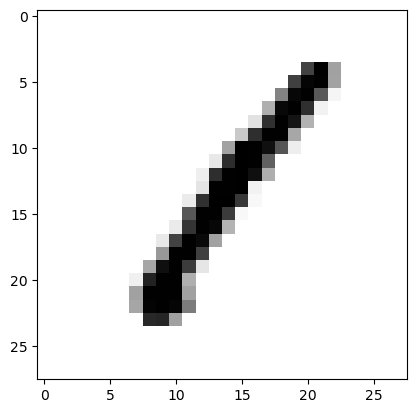

In [13]:
plt.figure()
plt.imshow(images[0], cmap="gray_r")   # plt.imshow() displays the data array as an image
plt.show()

For our first hand drawn image, this definitely looks like a 1. Next, we will iterate through the dataset and see what each class from 0-9 look like as images:
1. We can make a subplot of 10 figures
2. Create a For loop so that our labels (y) matches the 2D array.

**Code explanation**
- The range(10) generates values from 0 to 9
- The axes.ravel() flattens the 2D array of the image into a 1D array
- The zip() numpy function combines the two iterables where each iteration pairs a digit class with a subplot.

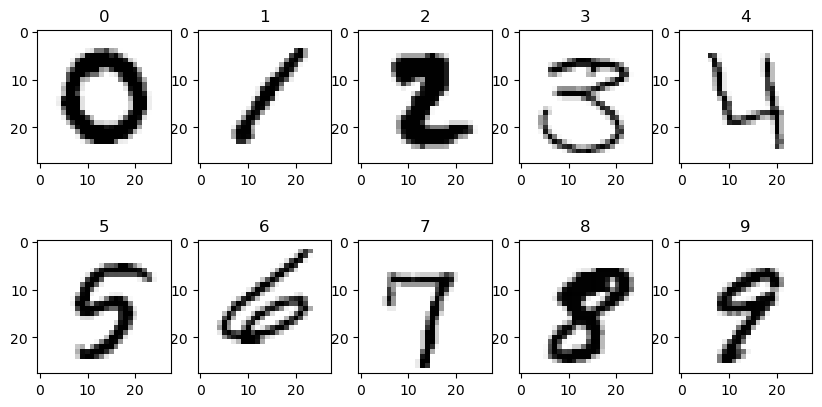

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for target, ax in zip(range(10), axes.ravel()):
    ax.imshow(images[y==target][0], cmap = 'gray_r')
    ax.set_title(target)
    
plt.show()

Wow some of these numbers are horribly drawn and will be difficult for even humans to read! Next we can use np.mean() to average out what the average hand drawn 0-9 would look like.

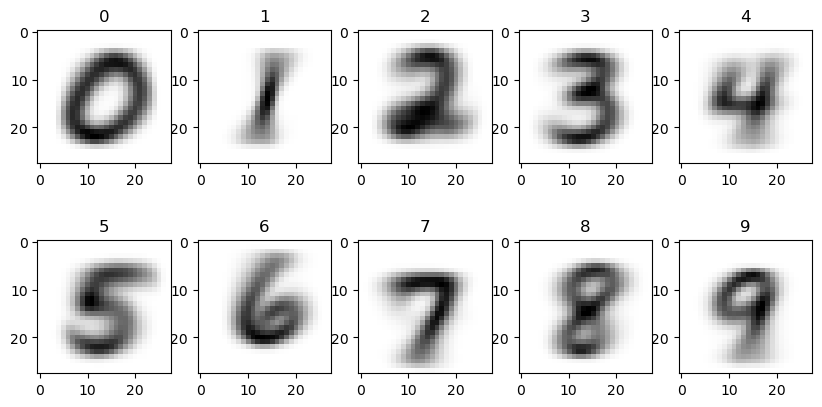

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for target, ax in zip(range(10), axes.ravel()):
    ax.imshow(np.mean(images[y==target], axis=0), cmap = 'gray_r')
    ax.set_title(target)
    
plt.show()

Once this is averaged out, we can see how most people in this dataset usually draws their digits. It's interesting to see that a lot of people draw a loop inside the `2`. For the digit number `1`, some people have the 1 slanted to the right and some have it slanted to the left.

**1.2 Pixel Distribution**


<a id = 'eda'><a/>
### 2. Exploratory Data Analysis

---

In [16]:
#### CALVIN ADD EDA HERE ###

#### Class Distribution

Let's look at the distribution of our class labels to see if we have any major data imbalances. Our class labels range from $0$ to $9$.

>**Note**: Since this is multiclass classification, **we will always have data imbalance** since we are comparing one class to all the other classes at a time. 

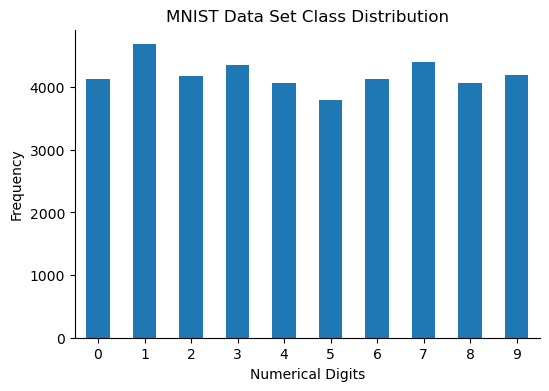

In [18]:
plt.figure(figsize=(6,4))
y.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("MNIST Data Set Class Distribution")
plt.xlabel("Numerical Digits")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
sns.despine()
plt.show()

Looking at our class distribution above we see that each class seems to have a relatively similar number of appearances. Class 1 seems to have the highest overall frequency while class 5 seems to have the lowest. Note that class imbalance is still present because we are working with multiclass classification, meaning we are comparing one class label to the rest of the other labels at a time. 

<a id = 'base'><a/>
### 3. Baseline Modelling

---
    
1. Create test and validation set with train_test_split()
2. Fit basic Logistic Regression Model
3. Evaluate Metrics

In [19]:
# Creating test and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y)

In [20]:
X_train.shape, y_train.shape

((31500, 784), (31500,))

Making the pre-trained Logistic Regression model that will be used for making predictions.

In [21]:
base_logreg = LogisticRegression()
base_logreg.fit(X_train, y_train)

LogisticRegression()

In [22]:
print(f' Train_Accuracy: {base_logreg.score(X_train, y_train)}, Val_Accuracy: {base_logreg.score(X_val, y_val)}')

 Train_Accuracy: 0.9417142857142857, Val_Accuracy: 0.9144761904761904


With just the base logistic regression we are getting a very high train and validation accuracy with a small overfit in the training set. Let's look at a confusion matrix to measure how well our model is classifying each digit.

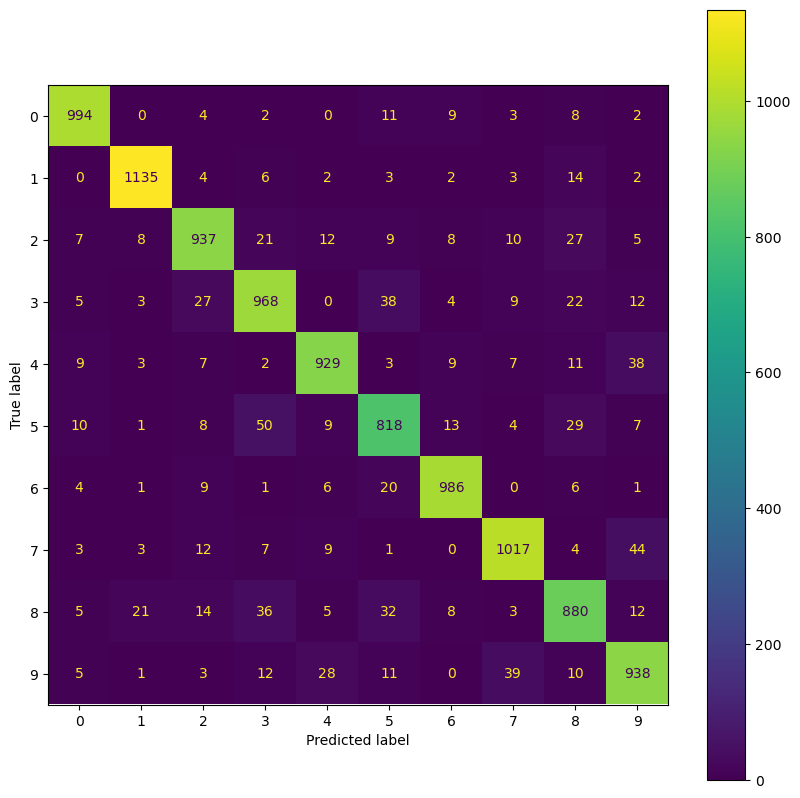

In [23]:
# Get predictions of validation set from model
y_pred = base_logreg.predict(X_val)

# Setup confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 10))

# Displays the confusion matrix
cf_disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=base_logreg.classes_
)

cf_disp.plot(ax=plt.gca()) # .gca = get current axis as the axis
plt.show()

#### Classification Report
The classification report provides a detailed evaluation of the model's performance on each class, along with overall metrics.

In [25]:
base_report = classification_report(y_val, y_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1033
           1       0.97      0.97      0.97      1171
           2       0.91      0.90      0.91      1044
           3       0.88      0.89      0.88      1088
           4       0.93      0.91      0.92      1018
           5       0.86      0.86      0.86       949
           6       0.95      0.95      0.95      1034
           7       0.93      0.92      0.93      1100
           8       0.87      0.87      0.87      1016
           9       0.88      0.90      0.89      1047

    accuracy                           0.91     10500
   macro avg       0.91      0.91      0.91     10500
weighted avg       0.91      0.91      0.91     10500



The overall accuracy of the model on the test set is 91%. With F1-scores ranging from 0.86 to 0.97, the model shows a balance between precision and recall for most classes.

### Generating Predictions for Test Set using Logistic Regression

In this process, we aim to generate predictions for the test set using our baseline model along with the test_data.csv file and our logistic regression model. This will allow us to evaluate the model's effectiveness in making accurate predictions on unseen data.

In [26]:
df_test.shape 

(28000, 784)

We initialize an index range starting from 1 up to the number of rows in df_test, representing the image IDs for our predictions.

In [27]:
index = range(1, df_test.shape[0] + 1)

We create a new DataFrame logreg_prediction containing the predicted labels generated by the logistic regression model `base_logreg` for the test data `df_test`. We assign 'ImageId' to the index column, so that it represents the IDs of the images.

In [28]:
logreg_prediction = pd.DataFrame({'Label':base_logreg.predict(df_test)}, index=index)
logreg_prediction.index.name = 'ImageId'

In [29]:
logreg_prediction

,Label
ImageId,
1,2
2,0
3,9
4,7
5,3
...,...
27996,9
27997,7
27998,3


We've succesfully created our prediction DataFrame, now we can save this as a csv to submit and receive our score.

In [30]:
# logreg_prediction.to_csv('../logreg_prediction.csv')

After submission, we received a score of 0.91617!

### Conclusion

### References

- [Kaggle Digit Recognizer Submissions](https://www.kaggle.com/competitions/digit-recognizer/submissions)